# Analysing Baseball game Data
## Zsombor Hegedűs & Brúnó Helmeczy

#### Prepared for: Coding 3: Data Analysis & Management with Python 
#### Instructor: Eszter Somos 
#### MSc Business Analytics @ Central European University
#### [Github](https://github.com/zsomborh/analyse_baseball_matches) 

In [2]:
import pandas as pd
import numpy as np

In [3]:
# We 1st load our dataframes: Our raw data consists of 3 tables:
    # Games: Available information on every single game (1 observation), 
        # including location, datetime, home & away teams, scores (features)
    # Atbats: A game generally consists of 1 team throwing (pitching) the ball, the other trying to hit it far away.
        # Atbats are the occasion of a team (member) trying to hit the pitched ball away - as such Atbats & Pitches have a 1-to-1 relationship
        # Available Features describe the player to hit, the player to throw, the game, its inning, which team hits & what the outcome is 
    # Pitches: how the ball is thrown can be described in much more detail then whether it has been succesfully hit or not.
        # a pitch can be summatively described by its type, which can be further specified by ball speed & spin.
            # speed can further be broken down by start- & ending speed,
            # spin can further be described by spin direction, spin angle (the angle of curvature resulting from the ball spinning)
            # such spin directions & angles enable using variables to describe 3d coordinates 
                #(features px, py, break_y, ax, ay, az, vx0, vy0, vz0, x, x0, y, y0, z0,pfx_x, pfx_z) 
            # Final group of variables describes the game situation pitches were played in + their outcomes:
                # b_score, b_count, s_count, outs, on_1b, on_2b, on_3b

Games = pd.read_csv("games.csv")
Atbats = pd.read_csv("atbats.csv")
Pitches = pd.read_csv("pitches.csv")

In [4]:
for df in [Games, Atbats, Pitches]:
    print(df.columns)

Index(['attendance', 'away_final_score', 'away_team', 'date', 'elapsed_time',
       'g_id', 'home_final_score', 'home_team', 'start_time', 'umpire_1B',
       'umpire_2B', 'umpire_3B', 'umpire_HP', 'venue_name', 'weather', 'wind',
       'delay'],
      dtype='object')
Index(['ab_id', 'batter_id', 'event', 'g_id', 'inning', 'o', 'p_score',
       'p_throws', 'pitcher_id', 'stand', 'top'],
      dtype='object')
Index(['px', 'pz', 'start_speed', 'end_speed', 'spin_rate', 'spin_dir',
       'break_angle', 'break_length', 'break_y', 'ax', 'ay', 'az', 'sz_bot',
       'sz_top', 'type_confidence', 'vx0', 'vy0', 'vz0', 'x', 'x0', 'y', 'y0',
       'z0', 'pfx_x', 'pfx_z', 'nasty', 'zone', 'code', 'type', 'pitch_type',
       'event_num', 'b_score', 'ab_id', 'b_count', 's_count', 'outs',
       'pitch_num', 'on_1b', 'on_2b', 'on_3b'],
      dtype='object')


In [5]:
# As said, pitches & atbats are 1-to-1 match, & they can be allocated to the game they happened in
# enabling us to join the 3 data frames in a single table.

# Games['g_id'] == Atbats['g_id']
# Pitches['ab_id'] == Atbats['ab_id']

Games = Games[['g_id','attendance','venue_name',
               'date','start_time', 'elapsed_time','delay','weather','wind',
               'away_team','home_team','away_final_score','home_final_score']]
Atbats = Atbats[['ab_id','event','g_id','inning','o','p_score','p_throws','stand','top']]
Pitches = Pitches[['ab_id','type','b_count','s_count','outs',
                   'pitch_type','pitch_num','spin_rate','start_speed','end_speed',
                   'code','zone']]

# Merge dataframes:
Pitches_n_Atbats = pd.merge(Pitches,Atbats, how = 'left')
Df_Merged = pd.merge(Pitches_n_Atbats, Games, how = 'left')

Df_Merged.columns

Df_Merged.to_csv("Baseball_Merged.csv", index = False)
# Column Descriptions:
    # ab_id       - Id of at bat
    # type        - Pitch Type: CH=Changeup, CU=Curveball, EP=Eephus*, FC=Cutter, FF=Four-seam Fastball, FO=Pitchout (or PO)
                            #  FS=Splitter, FT=2-seam Fastball, IN=Intentional ball, KC=Knuckle curve, KN=Knuckeball, 
                            #  PO=Pitchout (or FO), SC=Screwball, SI=Sinker, SL=Slider,UN=Unknown
            # Some occur rarely -> decrease factors to 3-5 most-frequent + 'Others' 
    # b_count     - Balls hit (in current round)
    # s_count     - Strikes   (in current round)
    # outs        - How many outs are there for the hitting team in the current inning - should be 0-2
    # pitch_type  - Should be same as type 
    # pitch_num   - Defending team can have many Nr. pitches until 3 outs are made 
    # spin_rate   - Of ball in rounds per minute (RPM
    # start_speed - Ball speed at release
    # end_speed   - Ball speed at hit 
    # code        - 
    # zone        - 
    # event       - Outcome of Pitch/Atbat - what the pitch resulted in 
    # g_id        - 
    # inning      - should be 1-9 -> Like quarters in NBA/NFL - baseball is played in 9 innings
    # o           - 
    # p_score     - 
    # p_throws    - 
    # stand       - Batter Left/Right handed stand
    # top         - Yes/No -  Innings consist of 2 halves, the "top" (first) & "bottom" (second). 
                            # In each half, one team bats until 3 outs are made, with other team playing defense. 
    # delay       - Game started late by X minutes
    # weather     - weather-description string 
    # wind        - string with windspeed inside
    # away_team
    # home_team
    # away_final_score
    # home_final_score
    # 
    # 
    # 
    



In [6]:
Df_Merged.dropna(subset = ['zone']).isna().sum()

ab_id                  0
type                   0
b_count                0
s_count                0
outs                   0
pitch_type             0
pitch_num              0
spin_rate              0
start_speed            0
end_speed              0
code                5715
zone                   0
event                  0
g_id                   0
inning                 0
o                      0
p_score                0
p_throws               0
stand                  0
top                    0
attendance             0
venue_name             0
date                   0
start_time             0
elapsed_time           0
delay                  0
weather                0
wind                   0
away_team              0
home_team              0
away_final_score       0
home_final_score       0
dtype: int64

In [7]:
Df_Merged['code'].unique()

array(['C', 'S', 'F', 'B', 'X', 'D', 'E', '*B', 'L', 'W', 'T', 'I', 'M',
       'H', 'P', 'V', 'Q', 'R', nan, 'Z'], dtype=object)

(array([4.85605025e-05, 1.47018035e-04, 2.26246297e-04, 2.64180521e-04,
        2.71506493e-04, 2.83438742e-04, 3.32045886e-04, 4.28264614e-04,
        5.57235506e-04, 6.74590992e-04, 6.35822042e-04, 4.18402295e-04,
        1.99517354e-04, 7.44080777e-05, 2.10466908e-05, 4.71564248e-06,
        9.53743517e-07, 2.94325571e-07, 1.19016898e-07, 5.14667665e-08,
        5.46834394e-08, 1.76917010e-08, 1.44750281e-08, 9.65001872e-09,
        4.82500936e-09, 1.60833645e-09, 0.00000000e+00, 0.00000000e+00,
        1.60833645e-09, 4.82500936e-09]),
 array([1.21400000e+00, 2.19148833e+02, 4.37083667e+02, 6.55018500e+02,
        8.72953333e+02, 1.09088817e+03, 1.30882300e+03, 1.52675783e+03,
        1.74469267e+03, 1.96262750e+03, 2.18056233e+03, 2.39849717e+03,
        2.61643200e+03, 2.83436683e+03, 3.05230167e+03, 3.27023650e+03,
        3.48817133e+03, 3.70610617e+03, 3.92404100e+03, 4.14197583e+03,
        4.35991067e+03, 4.57784550e+03, 4.79578033e+03, 5.01371517e+03,
        5.23165000e+03

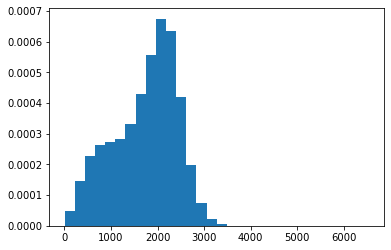

In [8]:
# We are praticularly interested in how pitches' measures change in response to various characteristics:
# Our 1st question explores how pitches evolve over the course of a game:
    # In other words the general question is how well can we tell what pitch is going to be thrown given available explanatory variables
        # as mentioned above, these variables relate to in game scenarioes, who throws & who hits
        # the underlying problem however is of a multi-class classification
            # most likely best solved with a multinomial logit model
                # this is both beyond the scope of our statistical abilities 
                # also would not most likely lead to significantly more relevant results, vs 1st looking to reduce the number of possible pitch types
                    # this also coins the question, given 15 different pitch types are denoted,
                        # however most likely their characteristics are not equidistant from one another. 
                    

import matplotlib.pyplot as plt 
%matplotlib inline

plt.hist(x  = Df_Merged['spin_rate'], density = True, bins = 30)


(array([1.63024801e-07, 1.63024801e-07, 1.95629762e-06, 4.89074404e-06,
        5.70586805e-06, 7.01006646e-06, 1.20638353e-05, 1.40201329e-05,
        2.11932242e-05, 2.91814394e-05, 4.82553412e-05, 7.54804830e-05,
        1.85033149e-04, 4.24679607e-04, 1.02298063e-03, 2.70441843e-03,
        6.41176543e-03, 1.09135323e-02, 1.93184390e-02, 2.76051526e-02,
        3.95613916e-02, 4.52807907e-02, 5.66840495e-02, 7.70577479e-02,
        9.29895097e-02, 5.98517844e-02, 2.16188819e-02, 2.98791856e-03,
        2.62959004e-04, 1.51613065e-05]),
 array([32.4 , 34.55, 36.7 , 38.85, 41.  , 43.15, 45.3 , 47.45, 49.6 ,
        51.75, 53.9 , 56.05, 58.2 , 60.35, 62.5 , 64.65, 66.8 , 68.95,
        71.1 , 73.25, 75.4 , 77.55, 79.7 , 81.85, 84.  , 86.15, 88.3 ,
        90.45, 92.6 , 94.75, 96.9 ]),
 <BarContainer object of 30 artists>)

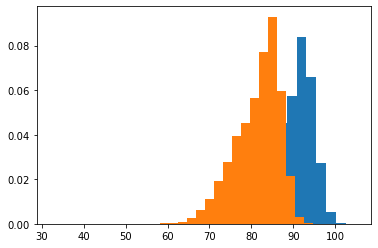

In [9]:
import matplotlib.pyplot as plt 
%matplotlib inline

plt.hist(x  = Df_Merged['start_speed'], density = True, bins = 30)
plt.hist(x  = Df_Merged['end_speed'], density = True, bins = 30)


In [10]:
Df_Merged['zone'].unique()

array([ 3.,  5.,  1., 13.,  6.,  7., 14., 11.,  9.,  2.,  8.,  4., 12.,
       nan])

In [11]:
len(Df_Merged)

2867154

## Cleaning

In [12]:
Df_Merged.dropna(subset = ['zone'], inplace = True)
Df_Merged.loc[Df_Merged['code'].isna(),['code']] = 'Unknown'
Df_Merged.isna().sum()

# TODO1: Look at extreme values 
# TODO2: Aggregate data to some levels
# TODO3: Correlations - looking at histograms
# TODO4: Add commentary for possible feature engineering

ab_id               0
type                0
b_count             0
s_count             0
outs                0
pitch_type          0
pitch_num           0
spin_rate           0
start_speed         0
end_speed           0
code                0
zone                0
event               0
g_id                0
inning              0
o                   0
p_score             0
p_throws            0
stand               0
top                 0
attendance          0
venue_name          0
date                0
start_time          0
elapsed_time        0
delay               0
weather             0
wind                0
away_team           0
home_team           0
away_final_score    0
home_final_score    0
dtype: int64

In [20]:
Df_Merged.dtypes

ab_id               float64
type                 object
b_count             float64
s_count             float64
outs                float64
pitch_type           object
pitch_num           float64
spin_rate           float64
start_speed         float64
end_speed           float64
code                 object
zone                float64
event                object
g_id                  int64
inning                int64
o                     int64
p_score               int64
p_throws             object
stand                object
top                    bool
attendance            int64
venue_name           object
date                 object
start_time           object
elapsed_time          int64
delay                 int64
weather              object
wind                 object
away_team            object
home_team            object
away_final_score      int64
home_final_score      int64
dtype: object

### Summary Stats Table

In [41]:
summarydata = []
for cols in Df_Merged.columns:
    if (Df_Merged[cols].dtypes == 'int64') | (Df_Merged[cols].dtypes == 'float64') | (Df_Merged[cols].dtypes == 'bool'):
        stats = []
        stats.append(cols)
        stats.append(Df_Merged[cols].min())
        stats.append(Df_Merged[cols].mean())
        stats.append(Df_Merged[cols].median())
        stats.append(Df_Merged[cols].max())
        stats.append(len(Df_Merged[cols].unique()))
        summarydata.append(stats)

summarydata = pd.DataFrame(summarydata)
summarydata.columns = ['Variable','Min_Value','Mean','Median','Max_Value','Nr_Unique Values']
summarydata = summarydata[(summarydata['Variable'] != 'g_id') & (summarydata['Variable'] != 'ab_id') ]
summarydata
#len(Df_Merged['top'].unique())

,Variable,Min_Value,Mean,Median,Max_Value,Nr_Unique Values
1,b_count,0,0.880707,1.000,4,5
2,s_count,0,0.883161,1.000,2,3
3,outs,0,0.981285,1.000,2,3
4,pitch_num,1,2.895127,3.000,21,21
5,spin_rate,1.214,1731.172889,1866.322,6539.26,1687547
6,start_speed,33.9,88.381244,89.700,105,627
7,end_speed,32.4,81.362756,82.500,96.9,574
8,zone,1,9.819750,11.000,14,13
10,inning,1,5.002603,5.000,19,19
11,o,0,1.673902,2.000,3,4


In [12]:
# Aggregation -> To per Game -> 9711 & game situations i.e. type, b_count, s_count, outs, pitch_type
for col in ['type','b_count','s_count','outs','pitch_type']:
    print(Df_Merged[col].unique())
    print(len(Df_Merged[col].unique()))
# Pitch_Type -> Coerce  
 # type        - Pitch Type: CH=Changeup, CU=Curveball, EP=Eephus*, FC=Cutter, FF=Four-seam Fastball, FO=Pitchout (or PO)
                            #  FS=Splitter, FT=2-seam Fastball, IN=Intentional ball, KC=Knuckle curve, KN=Knuckeball, 
                            #  PO=Pitchout (or FO), SC=Screwball, SI=Sinker, SL=Slider,UN=Unknown
            # Some occur rarely -> decrease factors to 3-5 most-frequent + 'Others' 


['S' 'B' 'X']
3
[0. 1. 2. 3. 4.]
5
[0. 1. 2.]
3
[0. 1. 2.]
3
['FF' 'CU' 'FC' 'SI' 'CH' 'FT' 'IN' 'SL' 'KC' 'EP' 'FS' 'FO' 'PO' 'KN'
 'UN' 'SC' 'FA' 'AB']
18


In [13]:
Df_Merged.groupby('pitch_type').size().sort_values(ascending=False)
 # type        - Pitch Type: CH=Changeup, CU=Curveball, EP=Eephus*, FC=Cutter, FF=Four-seam Fastball, FO=Pitchout (or PO)
                            #  FS=Splitter, FT=2-seam Fastball, IN=Intentional ball, KC=Knuckle curve, KN=Knuckeball, 
                            #  PO=Pitchout (or FO), SC=Screwball, SI=Sinker, SL=Slider,UN=Unknown
            # Some occur rarely -> decrease factors to 3-5 most-frequent + 'Others' 

# FF = FT -> Fastball
# SL
# CH
# SI
# CU
# FO = PO -> Pitchout

pitch_type
FF    1014877
SL     450578
FT     337983
CH     292789
SI     242504
CU     234391
FC     149756
KC      66484
FS      43705
KN      11260
IN       6197
EP        815
FO        810
PO        628
SC        113
UN         57
FA          9
AB          9
dtype: int64

In [43]:
# FF = FT -> Fastball
# FO = PO -> Pitchout
# TO coerce to 'Other': IN, EP, FO, PO, SC, UN, AB, FA

df = Df_Merged.copy()
df['pitch_type'][df['pitch_type'] == 'FT' ] = 'FF'
df['pitch_type'][df['pitch_type'] == 'FO' ] = 'PO'
df['pitch_type'][(df['pitch_type']=='IN') | (df['pitch_type']=='EP') | (df['pitch_type']=='FO') | (df['pitch_type']=='PO') | (df['pitch_type']=='SC') | (df['pitch_type']=='UN') | (df['pitch_type']=='AB') | (df['pitch_type']=='FA') ] = 'Other'

df.groupby(['pitch_type']).size().sort_values(ascending=False)

<ipython-input-43-06e0308d93dc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pitch_type'][df['pitch_type'] == 'FT' ] = 'FF'
<ipython-input-43-06e0308d93dc>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pitch_type'][df['pitch_type'] == 'FO' ] = 'PO'
<ipython-input-43-06e0308d93dc>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pitch_type'][(df['pitch_type']=='IN') | (df['pitch_type']=='EP') | (df['pitch_type']=='FO'

pitch_type
FF       1352860
SL        450578
CH        292789
SI        242504
CU        234391
FC        149756
KC         66484
FS         43705
KN         11260
Other       8638
dtype: int64

### How different are remaining pitchtypes ?

In [53]:
# As 1st trial we want to check how characteristically different various pitch type may be
# Rather then look at pitches' specific curvatures & average 3d coordinates, we want to check differences in the most meaningful stats:
    # How fast the ball was at release & at hit, how much was it spinning, 

pitchgrouped = df.groupby('pitch_type').mean().round(2)
pitchgrouped['Nr_Obs'] = round(df.groupby(['pitch_type']).size()/(len(df)),4)*100
pitchgrouped = pitchgrouped.sort_values(ascending=False, by = 'Nr_Obs')
pitchgrouped[['Nr_Obs','start_speed','end_speed','spin_rate','inning','outs','b_count','s_count']]

,Nr_Obs,start_speed,end_speed,spin_rate,inning,outs,b_count,s_count
pitch_type,,,,,,,,
FF,47.42,92.70,85.05,2162.34,4.92,0.96,0.93,0.81
SL,15.79,84.36,78.13,796.09,5.38,1.02,0.82,1.03
CH,10.26,83.85,77.34,1732.42,4.77,1.00,0.93,0.96
SI,8.50,91.42,84.01,2102.41,5.22,0.95,0.91,0.75
CU,8.22,77.87,72.01,1259.93,4.75,1.01,0.66,1.00
FC,5.25,88.24,81.67,1148.87,5.13,0.99,0.90,0.89
KC,2.33,80.47,74.35,1279.83,4.95,1.02,0.71,0.99
FS,1.53,84.62,78.19,1435.90,5.11,1.01,0.94,1.12
KN,0.39,75.81,69.37,852.30,3.95,0.96,0.77,0.85


In [54]:
# Get Wind speed in MpH & Weather in Fahrenheit
wind_mph = []
for i in df['wind'][0:]:
    wind_speed = int(i[:2])
    wind_mph.append(wind_speed)

weather_fhr = []
for i in df['weather'][0:]:
    weather_F = int(i[:3])
    weather_fhr.append(weather_F)

df['wind'] = wind_mph 
df['weather'] = weather_fhr

In [55]:

pitchgrouped = df.groupby('pitch_type').mean().round(2)
pitchgrouped['Nr_Obs'] = round(df.groupby(['pitch_type']).size()/(len(df)),4)*100
pitchgrouped = pitchgrouped.sort_values(ascending=False, by = 'Nr_Obs')
pitchgrouped[['Nr_Obs','start_speed','end_speed','spin_rate','wind','weather','inning','outs','b_count','s_count']]

,Nr_Obs,start_speed,end_speed,spin_rate,wind,weather,inning,outs,b_count,s_count
pitch_type,,,,,,,,,,
FF,47.42,92.70,85.05,2162.34,7.51,73.65,4.92,0.96,0.93,0.81
SL,15.79,84.36,78.13,796.09,7.43,73.88,5.38,1.02,0.82,1.03
CH,10.26,83.85,77.34,1732.42,7.54,73.55,4.77,1.00,0.93,0.96
SI,8.50,91.42,84.01,2102.41,7.65,73.35,5.22,0.95,0.91,0.75
CU,8.22,77.87,72.01,1259.93,7.57,73.69,4.75,1.01,0.66,1.00
FC,5.25,88.24,81.67,1148.87,7.43,73.22,5.13,0.99,0.90,0.89
KC,2.33,80.47,74.35,1279.83,7.38,73.56,4.95,1.02,0.71,0.99
FS,1.53,84.62,78.19,1435.90,7.16,73.16,5.11,1.01,0.94,1.12
KN,0.39,75.81,69.37,852.30,7.50,72.35,3.95,0.96,0.77,0.85


b_count


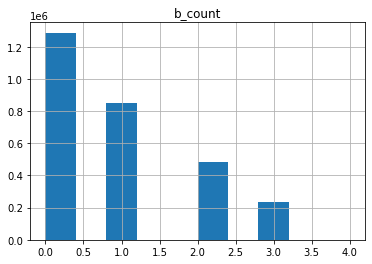

s_count


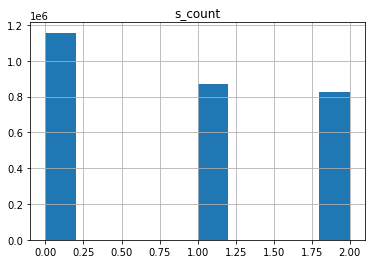

outs


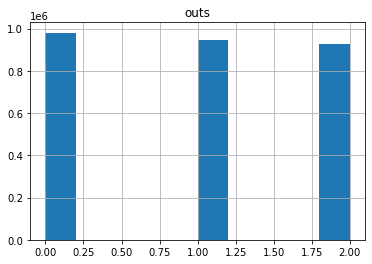

pitch_num


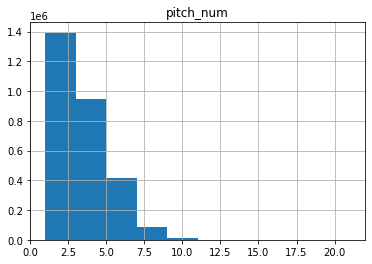

spin_rate


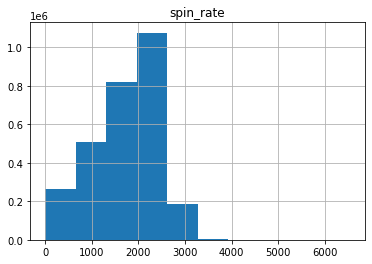

start_speed


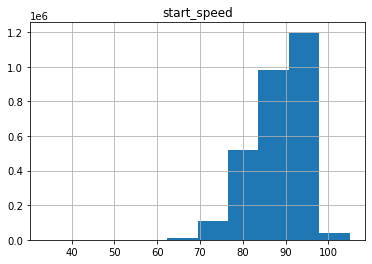

end_speed


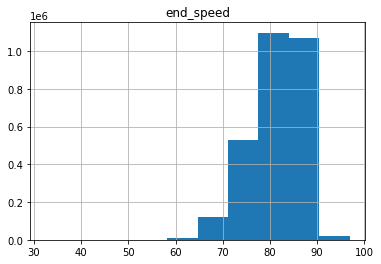

zone


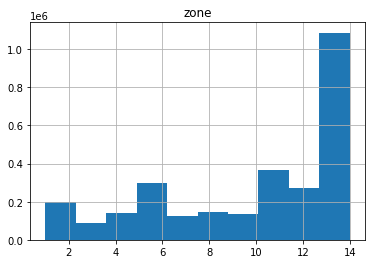

g_id


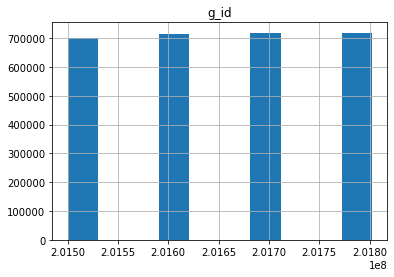

inning


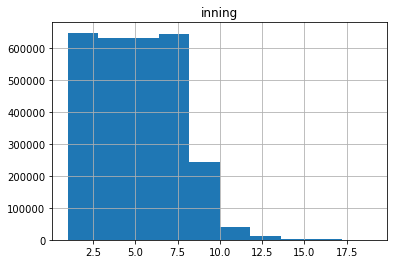

o


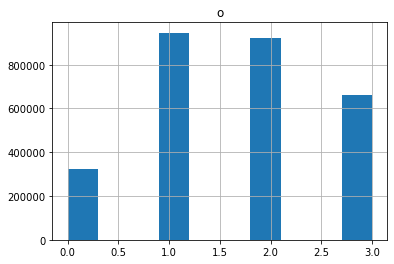

p_score


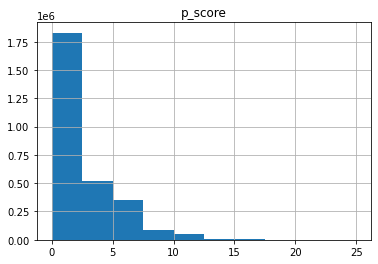

attendance


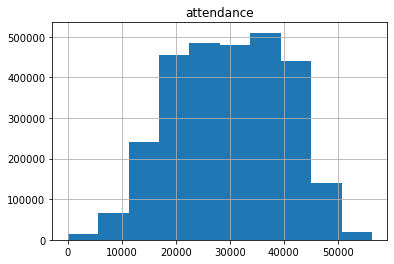

elapsed_time


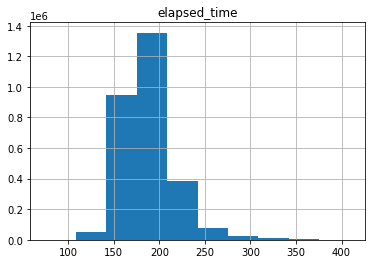

delay


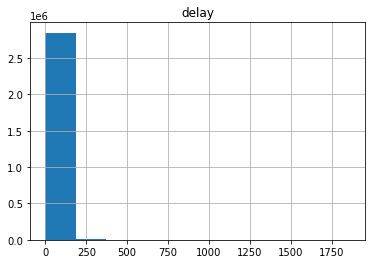

weather


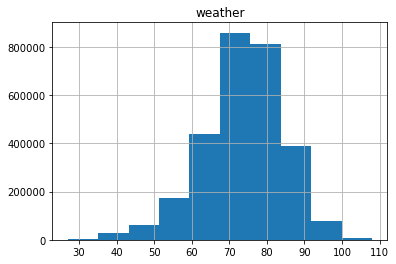

wind


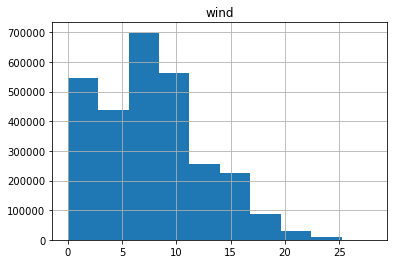

In [19]:
# EDA: Basic histogram of all vars w 1 loop
import matplotlib.pyplot as plt
%matplotlib inline

ColNames = df.columns.tolist()[1:-4]
vector = range(1,len(ColNames),1)

for i in vector:
    if df[ColNames[i]].dtypes == 'float64':
        print(ColNames[i])
        df.hist(ColNames[i])
    elif df[ColNames[i]].dtypes == 'int64':
        print(ColNames[i])
        df.hist(ColNames[i])
    plt.show()

# Skewness: p_score, delay -> maybe for Q2 with API weather data

# 

In [20]:
df.columns

Index(['ab_id', 'type', 'b_count', 's_count', 'outs', 'pitch_type',
       'pitch_num', 'spin_rate', 'start_speed', 'end_speed', 'code', 'zone',
       'event', 'g_id', 'inning', 'o', 'p_score', 'p_throws', 'stand', 'top',
       'attendance', 'venue_name', 'date', 'start_time', 'elapsed_time',
       'delay', 'weather', 'wind', 'away_team', 'home_team',
       'away_final_score', 'home_final_score'],
      dtype='object')

In [56]:
tocluster = df[['start_speed','end_speed','spin_rate','pitch_num','outs','inning','b_count','s_count']]
from sklearn import datasets
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
from collections import Counter

In [57]:
# K-Means Clustering
 # estimator = KMeans(init='k-means++', n_clusters=3)
 # estimator.fit(scale(tocluster))
 # print(estimator.labels_)


# Centers into Dataframe
 # centers = pd.DataFrame(estimator.cluster_centers_)
 # centers.columns = tocluster.columns
 # centers

# Choose K
dists = []
for cluster_num in range(3,9):
    print(cluster_num)
    estimator = KMeans(init='k-means++', n_clusters=cluster_num)
    estimator.fit(scale(tocluster))
    dists.append(estimator.inertia_)

3
4
5
6
7
8


<AxesSubplot:xlabel='n_clusters'>

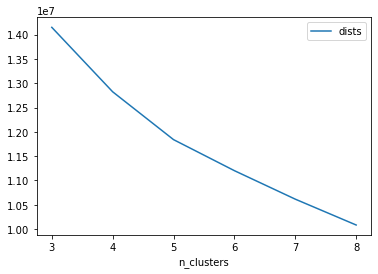

In [58]:
# Plot 2 check 4 Elbox point
pd.DataFrame({'dists':dists, 'n_clusters':list(range(3,9))}).plot(x='n_clusters',y='dists')

In [41]:
df[df.columns[(df.columns != 'type') & (df.columns != 'code') & (df.columns != 'pitch_type')  & (df.columns != 'event') & (df.columns != 'away_final_score') & (df.columns != 'home_final_score') & (df.columns != 'away_team') & (df.columns != 'home_team') & (df.columns != 'stand') & (df.columns != 'top')]]

,ab_id,b_count,s_count,outs,pitch_num,spin_rate,start_speed,end_speed,zone,g_id,...,p_score,p_throws,attendance,venue_name,date,start_time,elapsed_time,delay,weather,wind
0,2.015000e+09,0.0,0.0,0.0,1.0,2305.052,92.9,84.1,3.0,201500001,...,0,L,35055,Wrigley Field,2015-04-05,7:17 PM,184,0,44,7
1,2.015000e+09,0.0,1.0,0.0,2.0,2689.935,92.8,84.1,5.0,201500001,...,0,L,35055,Wrigley Field,2015-04-05,7:17 PM,184,0,44,7
2,2.015000e+09,0.0,2.0,0.0,3.0,2647.972,94.1,85.2,1.0,201500001,...,0,L,35055,Wrigley Field,2015-04-05,7:17 PM,184,0,44,7
3,2.015000e+09,0.0,2.0,0.0,4.0,1289.590,91.0,84.0,13.0,201500001,...,0,L,35055,Wrigley Field,2015-04-05,7:17 PM,184,0,44,7
4,2.015000e+09,1.0,2.0,0.0,5.0,1374.569,75.4,69.6,13.0,201500001,...,0,L,35055,Wrigley Field,2015-04-05,7:17 PM,184,0,44,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2867149,2.018186e+09,3.0,2.0,2.0,9.0,608.594,83.9,78.2,8.0,201802431,...,3,L,38450,Wrigley Field,2018-10-01,12:05 PM,186,0,65,6
2867150,2.018186e+09,0.0,0.0,2.0,1.0,2262.907,97.7,89.5,13.0,201802431,...,3,L,38450,Wrigley Field,2018-10-01,12:05 PM,186,0,65,6
2867151,2.018186e+09,1.0,0.0,2.0,2.0,2514.010,97.3,89.6,4.0,201802431,...,3,L,38450,Wrigley Field,2018-10-01,12:05 PM,186,0,65,6
2867152,2.018186e+09,1.0,1.0,2.0,3.0,2318.775,95.9,88.6,13.0,201802431,...,3,L,38450,Wrigley Field,2018-10-01,12:05 PM,186,0,65,6


# Get Most Frequent Pitch type & propensity, given a game & its inning 

In [54]:
df.columns

Index(['ab_id', 'type', 'b_count', 's_count', 'outs', 'pitch_type',
       'pitch_num', 'spin_rate', 'start_speed', 'end_speed', 'code', 'zone',
       'event', 'g_id', 'inning', 'o', 'p_score', 'p_throws', 'stand', 'top',
       'attendance', 'venue_name', 'date', 'start_time', 'elapsed_time',
       'delay', 'weather', 'wind', 'away_team', 'home_team',
       'away_final_score', 'home_final_score'],
      dtype='object')

In [60]:
df_grouped2 = df.groupby(['g_id','date','inning','wind','weather','venue_name','pitch_type']).mean().reset_index()

# Pitch Type Aggreg 
    # take only g_id, inning, pitch_type
Pitch_dummies = df[['g_id','date','inning','pitch_type']]



In [61]:
# Pivot Pitchtype Cols & Count pitch types grouped by games & Inning
for i in Pitch_dummies['pitch_type'].unique():
    Pitch_dummies[i] = Pitch_dummies['pitch_type'] == i
Pitch_Counts = Pitch_dummies.groupby(['g_id','date','inning']).sum().reset_index()

# Row Sum Pitches & Get max Value - i.e. count pitches by game-inning & get most frequent pitch type
Pitch_Counts['Total_Pitches'] = Pitch_Counts[Pitch_dummies['pitch_type'].unique()].sum(axis = 1)
Pitch_Counts['Max_Pitch_Count'] = Pitch_Counts[Pitch_dummies['pitch_type'].unique()].max(axis = 1)


<ipython-input-61-a30edbcd8ce1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Pitch_dummies[i] = Pitch_dummies['pitch_type'] == i


In [62]:
Pitches_Numpy = Pitch_Counts[Pitch_dummies['pitch_type'].unique()].to_numpy(dtype=None, copy=False)
Max_Indices = np.argmax(Pitches_Numpy, axis = 1)
Most_Freq_Pitch = Pitch_dummies['pitch_type'].unique()[Max_Indices]

Pitch_Counts['Most_Freq_Pitch'] = Most_Freq_Pitch
Pitch_Counts['Most_Freq_Pitch%'] = round(Pitch_Counts['Max_Pitch_Count'] / Pitch_Counts['Total_Pitches'],4)*100
Pitches_Fin = Pitch_Counts[['g_id','date','inning','Total_Pitches','Max_Pitch_Count','Most_Freq_Pitch','Most_Freq_Pitch%']]
Pitches_Fin

,g_id,date,inning,Total_Pitches,Max_Pitch_Count,Most_Freq_Pitch,Most_Freq_Pitch%
0,201500001,2015-04-05,1,34,17,FF,50.00
1,201500001,2015-04-05,2,37,18,FF,48.65
2,201500001,2015-04-05,3,41,16,CU,39.02
3,201500001,2015-04-05,4,27,14,FF,51.85
4,201500001,2015-04-05,5,44,16,FF,36.36
...,...,...,...,...,...,...,...
89067,201802431,2018-10-01,5,24,14,SL,58.33
89068,201802431,2018-10-01,6,38,14,FF,36.84
89069,201802431,2018-10-01,7,16,9,FF,56.25
89070,201802431,2018-10-01,8,47,22,FF,46.81


In [90]:
df_grouped = df.groupby(['g_id','inning','wind','weather','venue_name']).mean().reset_index()
from scipy.stats import pearsonr
#df_grouped

df_grouped_merged = pd.merge(df_grouped, 
                             Pitch_Counts[['g_id','date','inning','Total_Pitches','Max_Pitch_Count','Most_Freq_Pitch','Most_Freq_Pitch%']],
                             how='left', left_on=['g_id','inning'], right_on=['g_id','inning'])

# pitch_type -> dummy_table (% frequency of pitchtype / game & b_count & s_count & outs & inning)
    # Clustering -> cluster pitch types to meaningful groups
    # Keep 2-4 groups 
    # final variables added to df = 1) most prevalent clustered-pitchtype 2) proportion to all -> DONE
# innings -> keep length of game = max(inning)
df_grouped_merged = df_grouped_merged[df_grouped_merged['g_id'] >= 201700001]
df_grouped_merged

,g_id,inning,wind,weather,venue_name,ab_id,b_count,s_count,outs,pitch_num,...,attendance,elapsed_time,delay,away_final_score,home_final_score,date,Total_Pitches,Max_Pitch_Count,Most_Freq_Pitch,Most_Freq_Pitch%
44565,201700001,1,8,63,Busch Stadium,2.017000e+09,0.870968,0.741935,0.741935,2.612903,...,47566.0,213.0,0.0,3.0,4.0,2017-04-02,31,14,FF,45.16
44566,201700001,2,8,63,Busch Stadium,2.017000e+09,1.000000,1.195122,0.731707,3.365854,...,47566.0,213.0,0.0,3.0,4.0,2017-04-02,41,18,FF,43.90
44567,201700001,3,8,63,Busch Stadium,2.017000e+09,0.804348,1.021739,1.043478,2.978261,...,47566.0,213.0,0.0,3.0,4.0,2017-04-02,46,14,FF,30.43
44568,201700001,4,8,63,Busch Stadium,2.017000e+09,0.722222,0.333333,0.944444,2.055556,...,47566.0,213.0,0.0,3.0,4.0,2017-04-02,18,5,CH,27.78
44569,201700001,5,8,63,Busch Stadium,2.017000e+09,0.960000,0.720000,1.280000,2.680000,...,47566.0,213.0,0.0,3.0,4.0,2017-04-02,25,18,FF,72.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89067,201802431,5,6,65,Wrigley Field,2.018186e+09,1.000000,0.791667,1.000000,2.833333,...,38450.0,186.0,0.0,3.0,1.0,2018-10-01,24,14,SL,58.33
89068,201802431,6,6,65,Wrigley Field,2.018186e+09,1.394737,0.657895,0.868421,3.052632,...,38450.0,186.0,0.0,3.0,1.0,2018-10-01,38,14,FF,36.84
89069,201802431,7,6,65,Wrigley Field,2.018186e+09,0.625000,0.500000,1.125000,2.125000,...,38450.0,186.0,0.0,3.0,1.0,2018-10-01,16,9,FF,56.25
89070,201802431,8,6,65,Wrigley Field,2.018186e+09,1.085106,1.063830,0.723404,3.404255,...,38450.0,186.0,0.0,3.0,1.0,2018-10-01,47,22,FF,46.81


In [68]:
summarybygame = df_grouped_merged.groupby('Most_Freq_Pitch').mean().round(2)
summarybygame['Nr_Games'] = round(df_grouped_merged.groupby('Most_Freq_Pitch').size()/(len(df_grouped_merged)),2)*100
summarybygame = summarybygame.sort_values(ascending = False, by = 'Nr_Games') 
summarybygame[['Nr_Games','b_count','s_count','spin_rate','delay','Total_Pitches','start_speed','end_speed']]

,Nr_Games,b_count,s_count,spin_rate,delay,Total_Pitches,start_speed,end_speed
Most_Freq_Pitch,,,,,,,,
FF,81.0,0.86,0.88,1765.63,4.15,32.66,88.90,81.56
SI,8.0,0.85,0.85,1773.64,4.20,31.31,88.46,81.14
SL,5.0,0.81,0.90,1456.63,3.80,30.85,87.29,80.22
FC,2.0,0.82,0.87,1528.35,2.65,29.12,88.61,81.49
CH,1.0,0.81,0.88,1710.52,2.74,30.18,85.72,78.70
CU,1.0,0.77,0.88,1571.80,3.73,29.48,84.91,78.03
FS,0.0,0.78,0.92,1639.76,3.31,25.62,87.74,80.44
KC,0.0,0.82,0.90,1521.87,2.32,29.84,86.40,79.31
KN,0.0,0.76,0.84,1266.00,6.27,30.93,81.72,74.87


In [105]:
MaxInnings = df_grouped_merged[['g_id','inning']].groupby('g_id').max()
MaxInnings.columns = ['Game_Length_Innings']

In [107]:
df_grouped_merged = pd.merge(df_grouped_merged,MaxInnings, on = 'g_id')
df_grouped_merged.to_csv("Baseball_merged_fin.csv")
df_grouped_merged                           

,g_id,inning,wind,weather,venue_name,ab_id,b_count,s_count,outs,pitch_num,...,delay,away_final_score,home_final_score,date,Total_Pitches,Max_Pitch_Count,Most_Freq_Pitch,Most_Freq_Pitch%,Game_Length_Innings_x,Game_Length_Innings_y
0,201700001,1,8,63,Busch Stadium,2.017000e+09,0.870968,0.741935,0.741935,2.612903,...,0.0,3.0,4.0,2017-04-02,31,14,FF,45.16,9,9
1,201700001,2,8,63,Busch Stadium,2.017000e+09,1.000000,1.195122,0.731707,3.365854,...,0.0,3.0,4.0,2017-04-02,41,18,FF,43.90,9,9
2,201700001,3,8,63,Busch Stadium,2.017000e+09,0.804348,1.021739,1.043478,2.978261,...,0.0,3.0,4.0,2017-04-02,46,14,FF,30.43,9,9
3,201700001,4,8,63,Busch Stadium,2.017000e+09,0.722222,0.333333,0.944444,2.055556,...,0.0,3.0,4.0,2017-04-02,18,5,CH,27.78,9,9
4,201700001,5,8,63,Busch Stadium,2.017000e+09,0.960000,0.720000,1.280000,2.680000,...,0.0,3.0,4.0,2017-04-02,25,18,FF,72.00,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44502,201802431,5,6,65,Wrigley Field,2.018186e+09,1.000000,0.791667,1.000000,2.833333,...,0.0,3.0,1.0,2018-10-01,24,14,SL,58.33,9,9
44503,201802431,6,6,65,Wrigley Field,2.018186e+09,1.394737,0.657895,0.868421,3.052632,...,0.0,3.0,1.0,2018-10-01,38,14,FF,36.84,9,9
44504,201802431,7,6,65,Wrigley Field,2.018186e+09,0.625000,0.500000,1.125000,2.125000,...,0.0,3.0,1.0,2018-10-01,16,9,FF,56.25,9,9
44505,201802431,8,6,65,Wrigley Field,2.018186e+09,1.085106,1.063830,0.723404,3.404255,...,0.0,3.0,1.0,2018-10-01,47,22,FF,46.81,9,9


In [50]:
# Possible Question 1s to answer: 
    # (How) Does pitch tendency change with games situation 
        # Filter data by year if needed -> g_id first 4 digits
        
# Correlation Matrix:
    # keep float / int columns
    
ColNames = df_grouped_merged.columns.tolist()
vector = range(1,len(ColNames),1)

X_var = []
Y_var = []
Correl = []

for i in vector:
    for j in vector:
        if (df_grouped_merged[ColNames[i]].dtypes == 'float64') & (df_grouped_merged[ColNames[j]].dtypes == 'float64'):
            X_var.append(ColNames[i])
            Y_var.append(ColNames[j])
            Cor = round(pearsonr(df_grouped_merged[ColNames[i]], df_grouped_merged[ColNames[j]])[0],4)
            Correl.append(Cor)

Correls = pd.DataFrame({'X_var':X_var,
                        'Y_var':Y_var,
                        'Correl':Correl})
Correls['Correl_Abs'] = abs(Correls['Correl'])

In [72]:
df_grouped_merged.corr().round(3)

,g_id,inning,wind,weather,ab_id,b_count,s_count,outs,pitch_num,spin_rate,...,p_score,top,attendance,elapsed_time,delay,away_final_score,home_final_score,Total_Pitches,Max_Pitch_Count,Most_Freq_Pitch%
g_id,1.000,0.004,-0.028,-0.005,0.996,-0.010,0.010,0.013,0.001,-0.263,...,-0.031,-0.002,-0.060,-0.064,0.020,-0.026,-0.035,-0.007,-0.037,-0.047
inning,0.004,1.000,0.008,-0.006,0.004,-0.028,0.004,-0.003,-0.011,-0.049,...,0.626,0.229,-0.002,0.108,-0.001,0.001,-0.006,-0.140,-0.129,-0.000
wind,-0.028,0.008,1.000,-0.112,-0.040,0.009,-0.007,-0.009,0.004,0.020,...,0.019,-0.001,0.101,0.037,0.013,0.035,0.010,0.012,0.012,0.001
weather,-0.005,-0.006,-0.112,1.000,0.029,-0.019,-0.005,0.005,-0.012,-0.184,...,0.039,0.001,0.051,0.017,-0.014,0.059,0.060,0.006,0.008,0.006
ab_id,0.996,0.004,-0.040,0.029,1.000,-0.010,0.011,0.012,0.001,-0.270,...,-0.030,-0.001,-0.057,-0.065,0.022,-0.027,-0.033,-0.006,-0.036,-0.047
b_count,-0.010,-0.028,0.009,-0.019,-0.010,1.000,0.027,0.012,0.688,0.066,...,-0.012,-0.048,0.002,0.111,-0.005,0.031,0.030,0.465,0.405,0.055
s_count,0.010,0.004,-0.007,-0.005,0.011,0.027,1.000,0.023,0.683,-0.039,...,-0.010,0.021,0.019,0.046,0.004,-0.020,-0.035,0.252,0.161,-0.065
outs,0.013,-0.003,-0.009,0.005,0.012,0.012,0.023,1.000,0.015,-0.015,...,-0.013,-0.001,0.001,0.000,-0.001,-0.011,-0.019,0.054,0.038,-0.010
pitch_num,0.001,-0.011,0.004,-0.012,0.001,0.688,0.683,0.015,1.000,0.025,...,-0.010,-0.021,0.012,0.106,0.004,0.012,0.000,0.496,0.398,0.003
spin_rate,-0.263,-0.049,0.020,-0.184,-0.270,0.066,-0.039,-0.015,0.025,1.000,...,-0.021,0.041,-0.033,0.009,-0.004,-0.019,-0.010,-0.021,0.226,0.392


<AxesSubplot:>

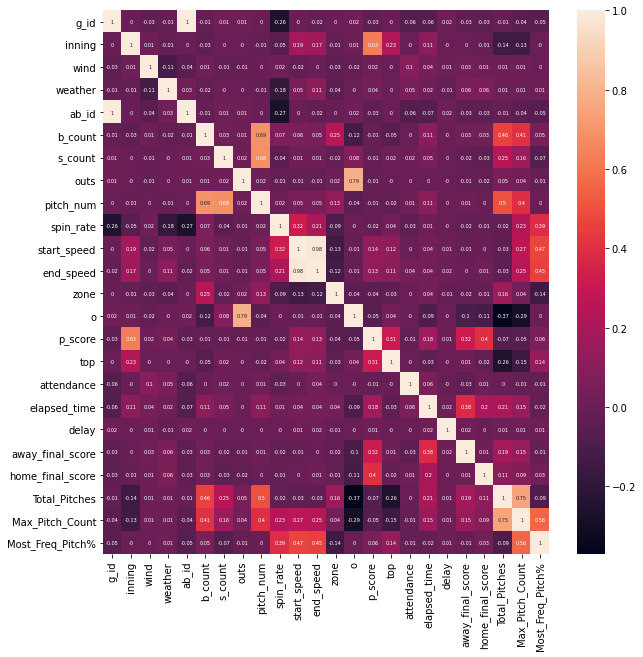

In [89]:
# library & dataset
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(df_grouped_merged.corr().round(2), annot=True, annot_kws={"size": 5},ax=ax)

In [95]:
Correls[(Correls['Correl_Abs'] != 1) & (Correls['Correl_Abs'] >= 0.4)].sort_values(by = 'Correl_Abs', ascending = False)

# Start-End speed fairly obviously related -> % / Abs.value drop in speed good target variable for weather-related Q2
# Pitch_Nr & bat / Strike count - fairly obvious -> more balls thrown = more balls hit/striked
# Spin_Rate & Ball Speed - most interesting finding so far -> solid question: how does it correlate with drop in ball_speed

,X_var,Y_var,Correl,Correl_Abs
115,start_speed,end_speed,0.9685,0.9685
132,end_speed,start_speed,0.9685,0.9685
63,outs,o,0.7856,0.7856
165,o,outs,0.7856,0.7856
22,b_count,pitch_num,0.6903,0.6903
73,pitch_num,b_count,0.6903,0.6903
40,s_count,pitch_num,0.6849,0.6849
74,pitch_num,s_count,0.6849,0.6849
125,start_speed,Most_Freq_Pitch%,0.4709,0.4709
312,Most_Freq_Pitch%,start_speed,0.4709,0.4709


In [107]:
#df_grouped_merged['Most_Freq_Pitch'].unique()

colors = {'FF':'red', 'CU': 'blue', 'CH':'green', 
          'SI':'black', 'SL':'yellow', 'FC':'orange', 
          'FS':'purple', 'KN':'magenta', 'KC':'aqua', 'Other': 'white'}


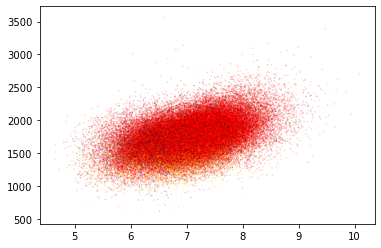

In [109]:
df_grouped_merged['speed_drop'] = df_grouped_merged['start_speed'] - df_grouped_merged['end_speed']
#df_grouped.hist('speed_drop')
#round(pearsonr(df_grouped['speed_drop'], df_grouped['spin_rate'])[0],4)

plt.scatter(df_grouped_merged['speed_drop'], df_grouped_merged['spin_rate'], s= 0.01,
            c=df_grouped_merged['Most_Freq_Pitch'].apply(lambda x: colors[x]))
plt.show()

weather


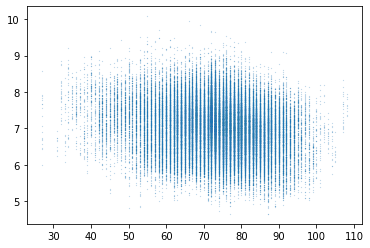

wind


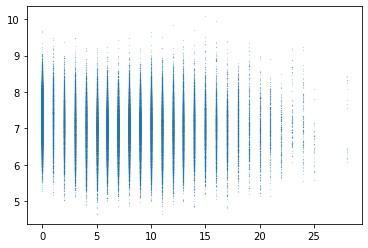

spin_rate


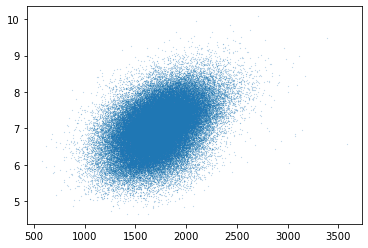

start_speed


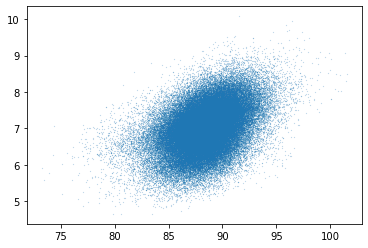

In [97]:
# Let us check speed drop vs weather, wind, spin_rate, start_speed
for i in ['weather','wind','spin_rate','start_speed']:
    print(i)
    plt.scatter(df_grouped_merged[i],df_grouped_merged['speed_drop'], s=0.01)
    plt.show()
